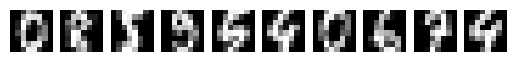

In [10]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

# Load sample digits (from sklearn's built-in dataset)
digits = load_digits()

def create_handwritten_digit_images():
    # Select random digits
    random_indices = np.random.randint(0, len(digits.images), 10)
    selected_digits = digits.images[random_indices]

    # Plot each digit
    for index, digit in enumerate(selected_digits):
        plt.subplot(1, 10, index + 1)
        plt.imshow(digit, cmap='gray', interpolation='none')
        plt.axis('off')

    plt.show()

create_handwritten_digit_images()

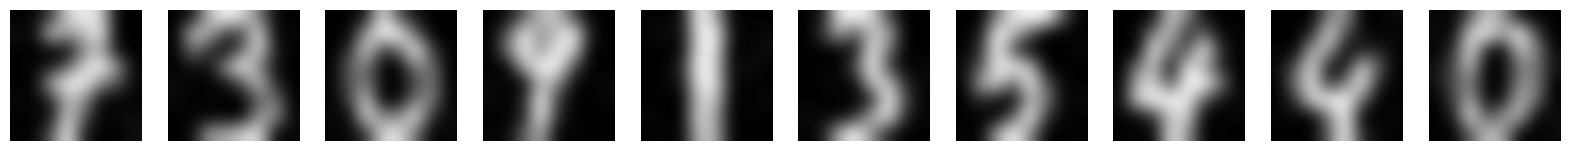

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
import random

# Load sample digits (from sklearn's built-in dataset)
digits = load_digits()

def create_test_digit_images():
    # Select random digits
    random_indices = np.random.randint(0, len(digits.images), 10)
    selected_digits = digits.images[random_indices]

    # Add random noise to create variations
    for digit in selected_digits:
        noise = np.random.normal(0, 0.5, digit.shape)
        np.clip(digit + noise, 0, 16, out=digit)

    # Set larger size for the plot
    plt.figure(figsize=(20, 4))

    # Plot each digit
    for index, digit in enumerate(selected_digits):
        plt.subplot(1, 10, index + 1)
        plt.imshow(digit, cmap='gray', interpolation='bicubic')
        plt.axis('off')

    plt.show()

create_test_digit_images()


In [13]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and preprocess digit data
digits = load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))  # Flatten the images

# Normalize pixel values
data = data / 16.0

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=True)

def to_categorical(y, num_classes):
    """Convert class vector (integers) to binary class matrix."""
    return np.eye(num_classes)[y]

y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

class Perceptron:
    def __init__(self, input_size, output_size, learning_rate=0.01):
        self.weights = np.random.randn(input_size, output_size) * 0.01
        self.bias = np.zeros(output_size)
        self.learning_rate = learning_rate

    def softmax(self, x):
        e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return e_x / np.sum(e_x, axis=1, keepdims=True)

    def forward(self, x):
        z = np.dot(x, self.weights) + self.bias
        return self.softmax(z)

    def loss(self, y_true, y_pred):
        # Categorical cross-entropy
        return -np.sum(y_true * np.log(y_pred + 1e-7)) / y_true.shape[0]

    def backprop(self, x, y_true, y_pred):
        m = y_true.shape[0]
        d_z = y_pred - y_true
        d_weights = np.dot(x.T, d_z) / m
        d_bias = np.sum(d_z, axis=0) / m

        self.weights -= self.learning_rate * d_weights
        self.bias -= self.learning_rate * d_bias

    def train(self, x_train, y_train, epochs):
        for epoch in range(epochs):
            y_pred = self.forward(x_train)
            loss = self.loss(y_train, y_pred)
            self.backprop(x_train, y_train, y_pred)
            if epoch % 10 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')

    def test(self, x_test, y_test):
        y_pred = self.forward(x_test)
        predictions = np.argmax(y_pred, axis=1)
        accuracy = np.mean(predictions == np.argmax(y_test, axis=1))
        return accuracy

# Initialize and train the perceptron
perceptron = Perceptron(input_size=64, output_size=10, learning_rate=0.01)

# Train with increased number of epochs
perceptron.train(x_train, y_train_encoded, epochs=200)  # Increased epochs

# Test the perceptron
accuracy = perceptron.test(x_test, y_test_encoded)
print(f'Test Accuracy: {accuracy}')



Epoch 0, Loss: 2.3062952264992442
Epoch 10, Loss: 2.2866652362937008
Epoch 20, Loss: 2.2673113669511618
Epoch 30, Loss: 2.248214189255095
Epoch 40, Loss: 2.229358207325472
Epoch 50, Loss: 2.2107310119137114
Epoch 60, Loss: 2.1923226186502016
Epoch 70, Loss: 2.1741249495474704
Epoch 80, Loss: 2.156131425919927
Epoch 90, Loss: 2.138336648251127
Epoch 100, Loss: 2.1207361441027732
Epoch 110, Loss: 2.103326169393344
Epoch 120, Loss: 2.0861035516181445
Epoch 130, Loss: 2.0690655660823642
Epoch 140, Loss: 2.052209838154177
Epoch 150, Loss: 2.0355342660494355
Epoch 160, Loss: 2.019036959832782
Epoch 170, Loss: 2.0027161932375233
Epoch 180, Loss: 1.9865703656257157
Epoch 190, Loss: 1.9705979719746036
Test Accuracy: 0.8331479421579533
